In [105]:
import gymnasium as gym
import moving_firefighter_env as mfp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [106]:
n = 10

In [122]:
env = gym.make("mfp/MovingFirefighter-v0", n=n, is_tree=True, render_mode="human", seed=0)
state, _ = env.reset()

In [123]:
graph_burnt_state = state["graph_burnt"]
graph_burnt = nx.Graph()
graph_burnt.add_nodes_from(range(len(graph_burnt_state.nodes)))
graph_burnt.add_edges_from(graph_burnt_state.edge_links)

In [124]:
graph_fighter_state = state["graph_fighter"]
graph_fighter = nx.complete_graph(len(graph_fighter_state.nodes))

In [125]:
positions = dict()
for i, pos in enumerate(graph_fighter_state.nodes):
    positions[i] = pos

In [126]:
distances = dict()
for edge, weight in zip(graph_fighter_state.edge_links, graph_fighter_state.edges):
    distances[tuple(edge)] = weight.item()

nx.set_edge_attributes(graph_fighter, distances, "distance")

Text(0.5, 1.0, "Fighter's graph view")

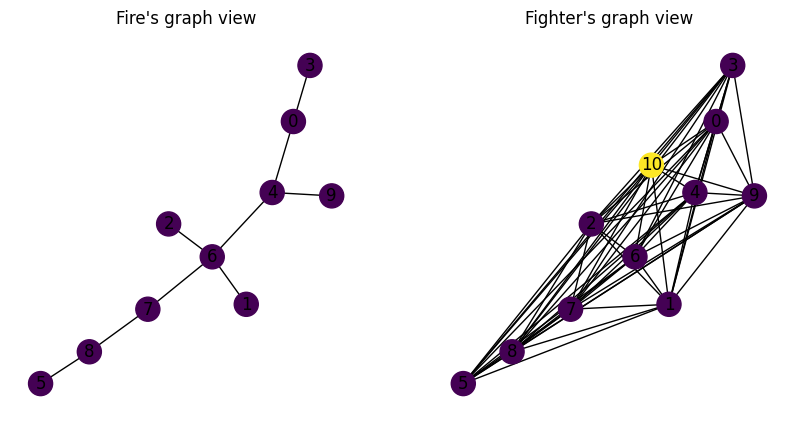

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

nx.draw(graph_burnt, pos=positions, with_labels=True, node_color=[0] * n, ax=ax1)
nx.draw(graph_fighter, pos=positions, with_labels=True, node_color=[0] * n + [1], ax=ax2)
ax1.set_title("Fire's graph view")
ax2.set_title("Fighter's graph view")

In [173]:
depth = dict()
visited = [6]

def compute_depth(root):
    node_depth = 1
    for neighbor in graph_burnt.neighbors(root):
        if neighbor not in visited:
            visited.append(neighbor)
            node_depth += compute_depth(neighbor)
    depth[root] = node_depth
    return node_depth

compute_depth(6)
depth

{1: 1, 2: 1, 3: 1, 0: 2, 9: 1, 4: 4, 5: 1, 8: 2, 7: 3, 6: 10}

In [174]:
valid_actions

array([0, 1, 2, 3, 4, 7, 9])

In [104]:
state, _ = env.reset()
done = False
final_reward = 0

for _ in range(30):
    action = np.random.choice(env.unwrapped.valid_actions())
    observation, reward, terminated, truncated, info = env.step(action)
    final_reward += reward

    if terminated or truncated:
        observation, info = env.reset()

print(f"Final reward: {final_reward}")
env.close()

Final reward: -40.0


In [ ]:
graph_fighter_state